In [1]:
# Import basic libraries for data handling and visualization
import numpy as np              # For numeric operations
import pandas as pd             # For working with tabular data
import seaborn as sns           # For beautiful graphs
import matplotlib.pyplot as plt # For plotting charts

# Import machine learning tools from Scikit-learn
from sklearn.datasets import load_iris                   # Load the built-in Iris dataset
from sklearn.model_selection import train_test_split     # To split the data into training and testing parts
from sklearn.preprocessing import StandardScaler         # To scale/normalize the data (important for some models)
from sklearn.neighbors import KNeighborsClassifier       # The K-Nearest Neighbors model we'll use
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # To evaluate the model

In [2]:
# Load the Iris dataset from sklearn
iris = load_iris()

# Convert it into a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the species column using the target values (0, 1, 2 → Setosa, Versicolor, Virginica)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Show the first 5 rows of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


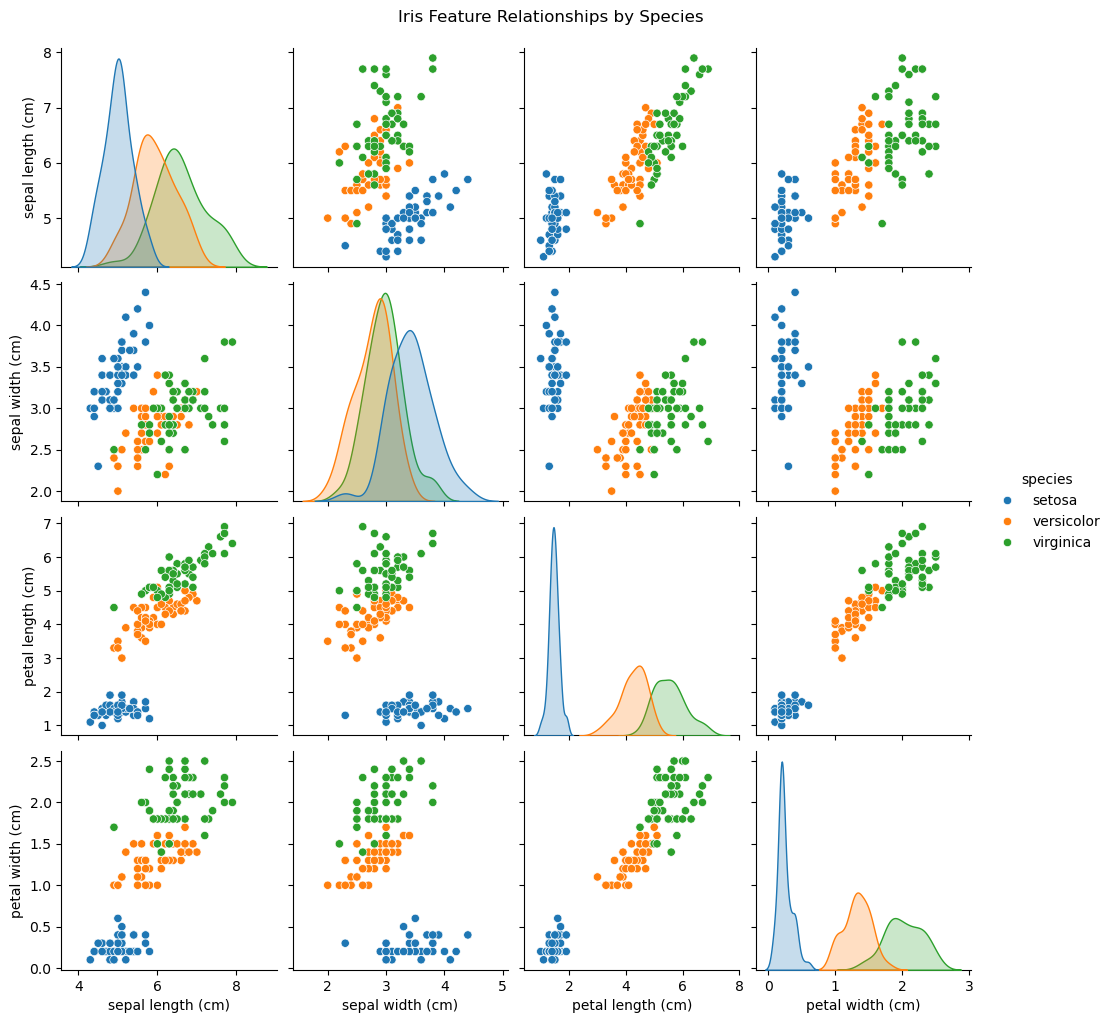

In [3]:
# Plot pairwise relationships in the dataset
sns.pairplot(df, hue='species')
plt.suptitle("Iris Feature Relationships by Species", y=1.02)
plt.show()



In [4]:
# Separate features (X) and target labels (y)
X = df.drop('species', axis=1)   # All columns except 'species'
y = df['species']                # Target variable: species

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (120, 4)
Testing features shape: (30, 4)
Training labels shape: (120,)
Testing labels shape: (30,)


In [5]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training features and transform them
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test features (use the same scaler)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN classifier with k=3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on scaled training data
knn.fit(X_train_scaled, y_train)

# Predict species for the test data
y_pred = knn.predict(X_test_scaled)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")


KNN Model Accuracy: 0.93


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


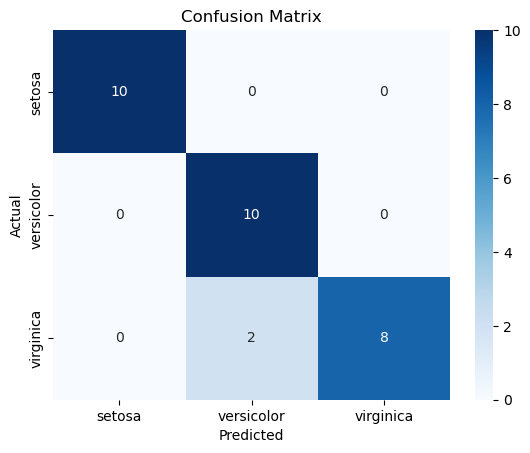

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [6]:
# Confusion matrix shows counts of correct and incorrect predictions per class
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Detailed classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

